# BÀI HƯỚNG DẪN THỰC HÀNH 1. THỐNG KÊ MÔ TẢ 

# 1. Cài đặt thư viện cần thiết 🐋

- Trong bài lab này sẽ thực hiện thống kê mô tả trên tổng GDP Việt Nam từ năm 2000 - 2022

   1.1 <span style="color:#bd4a55">.Cài đặt thư viện `requests`</span> 💻
    ```console
    pip install requests
    ```
     
   1.2 <span style="color:#bd4a55">.Import thư viện cần thiết để get API</span> 💻
   ```python
    import requests
    import pandas as pd
   ```
   
   1.3 <span style="color:#bd4a55">Giới thiệu về API World Bank.org</span> 💻
   
     World Bank API là một dịch vụ cung cấp dữ liệu từ Ngân hàng Thế giới, một tổ chức tài chính quốc tế cung cấp hỗ trợ tài chính và tư vấn cho các quốc gia phát triển. API cho phép nhà phát triển và người sử dụng truy cập các tập dữ liệu kinh tế, xã hội, và môi trường từ nhiều quốc gia trên thế giới.

    Dưới đây là một số điểm quan trọng về API World Bank:

    Dữ Liệu Đa Dạng: API cung cấp truy cập đến nhiều loại dữ liệu, bao gồm thông tin về tài chính, giáo dục, y tế, môi trường, và nhiều lĩnh vực khác.

    Dữ Liệu Toàn Cầu: World Bank API cung cấp dữ liệu từ nhiều quốc gia trên thế giới, giúp người dùng nắm bắt tình hình và xu hướng toàn cầu.

    Thông Tin Thời Gian Thực và Lịch Sử: API cung cấp truy cập đến dữ liệu thời gian thực cũng như dữ liệu lịch sử, cho phép người dùng theo dõi sự thay đổi và phát triển theo thời gian.

    Chia Sẻ Dữ Liệu Mở: Dữ liệu từ World Bank API thường được cung cấp dưới dạng dữ liệu mở, giúp khuyến khích sự chia sẻ và sử dụng rộng rãi.

    API Endpoint: Các endpoint của API có thể được sử dụng để thực hiện các yêu cầu đến các tập dữ liệu cụ thể và truy xuất thông tin chi tiết về các chỉ số kinh tế, xã hội.

    Ngôn Ngữ Lập Trình: API có thể được tích hợp với nhiều ngôn ngữ lập trình thông dụng, như Python, JavaScript, Java, và nhiều ngôn ngữ khác.

    Để sử dụng API World Bank, bạn cần đăng ký và nhận một khóa API từ trang web chính thức của World Bank. Sau đó, bạn có thể sử dụng khóa API này để thực hiện các yêu cầu HTTP và truy xuất dữ liệu từ World Bank.


In [1]:
# 1.1 Import thư viện request và thư viện pandas để lấy API
import requests
import pandas as pd

# Đường dẫn đến API của World Bank để lấy dữ liệu GDP
api_url = "http://api.worldbank.org/v2/country/VN/indicator/NY.GDP.MKTP.CD?format=json"

In [2]:
# 1.2 Gửi yêu cầu HTTP để lấy dữ liệu
response = requests.get(api_url)

In [3]:
# 1.3 Kiểm tra xem yêu cầu có thành công hay không
if response.status_code == 200:
    # Chuyển đổi dữ liệu JSON sang DataFrame sử dụng thư viện pandas
    data = response.json()
    df = pd.DataFrame(data[1])

    # Lọc và hiển thị các cột cần thiết (năm và giá trị GDP)
    df = df[['date', 'value']]
    df.columns = ['Year', 'GDP']

    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

   Year           GDP
0  2022  4.088024e+11
1  2021  3.661376e+11
2  2020  3.466158e+11
3  2019  3.343653e+11
4  2018  3.101065e+11


In [4]:
#1.4 Kiểm tra dataframe
df

,Year,GDP
0,2022,4.088024e+11
1,2021,3.661376e+11
2,2020,3.466158e+11
3,2019,3.343653e+11
4,2018,3.101065e+11
5,2017,2.813536e+11
6,2016,2.570960e+11
7,2015,2.392583e+11
8,2014,2.334515e+11
9,2013,2.137088e+11


# 2. Xử lý dữ liệu 🐋

- Chuyển dữ liệu từ kiểu `Series` sang `int` để thực hiện các phép so sánh trở nên dễ dàng
- Lấy dữ liệu GDP Việt Nam từ 2000 đến 2022 ✒️

In [5]:
df['Year'] = df['Year'].astype(int)

In [6]:
# 2.1 Lấy dữ liệu dataframe từ 2000 ~ 2022

df_process_1 = df[(df['Year'] >= 2000) & (df['Year'] <= 2022)]

In [7]:
# 2.2 Xử lý lấy dữ liệu từ năm 2000 ~ 2022

df_process_1

,Year,GDP
0,2022,4.088024e+11
1,2021,3.661376e+11
2,2020,3.466158e+11
3,2019,3.343653e+11
4,2018,3.101065e+11
5,2017,2.813536e+11
6,2016,2.570960e+11
7,2015,2.392583e+11
8,2014,2.334515e+11
9,2013,2.137088e+11


# 3 . Thực hiện thống kê mô tả 🐋

## 3.1 Thực hiện thống kê mô tả vị trí 💯

In [8]:
# 3.1 Trung bình giá trị GDP
df_process_1['GDP'].mean()

178119525213.19016

In [9]:
# 3.2 Tính trung vị giá trị GDP
df_process_1['GDP'].median()

172595034069.162

In [10]:
# 3.3 Tìm Max/Min giá trị GDP
print(df_process_1['GDP'].max())
print(df_process_1['GDP'].min())

408802379068.229
31172518403.3162


In [11]:
# 3.4 Thống kê nhanh giá trị GDP
df_process_1['GDP'].describe()

count    2.300000e+01
mean     1.781195e+11
std      1.231488e+11
min      3.117252e+10
25%      6.200246e+10
50%      1.725950e+11
75%      2.692248e+11
max      4.088024e+11
Name: GDP, dtype: float64

## 3.2 Thực hiện thống kê mô tả phân tán 💯

In [27]:
# 3.5 Phương sai
df_process_1['GDP'].var(ddof=1)

1.5165629432368267e+22

In [28]:
#3.6 Độ lệch chuẩn
df_process_1['GDP'].std(ddof=1)

123148810113.4894

In [14]:
#3.7 Tính chỉ số Q3
df_process_1['GDP'].quantile(0.75)

269224813640.66

In [15]:
#3.8 Tính chỉ số Q1
df_process_1['GDP'].quantile(0.25)

62002460278.227005

In [16]:
#3.9 Tính chỉ số IQR
IQR = df_process_1['GDP'].quantile(0.75) - df_process_1['GDP'].quantile(0.25)
IQR

207222353362.43298

In [17]:
#3.10 Tìm khoảng trần
upper_limit = df_process_1['GDP'].quantile(0.75) + 1.5*IQR
upper_limit

580058343684.3094

In [18]:
#3.11 Tìm khoảng sàn
lower_limit  = df_process_1['GDP'].quantile(0.25) - 1.5*IQR
lower_limit 

-248831069765.4225

## 3.3 Thực hiện thống kê mô tả hình dạng💯

In [19]:
# 3.12 Skewness
gdp_skewness = df_process_1['GDP'].skew()
gdp_skewness

0.33650164130872817

#### Nhận xét kết quả

Với giá trị skewness 0.3365, phân phối có một độ lệch nhẹ về phải, nhưng nó không phải là một độ lệch mạnh. Tính chất này chỉ ra rằng phần lớn dữ liệu tập trung ở bên trái của trung tâm phân phối, nhưng có một số giá trị cao hơn phía bên phải.

In [20]:
# 3.13 Kurtosis
gdp_kurtosis = df_process_1['GDP'].kurt()
gdp_kurtosis

-1.2461872011986999

#### Nhận xét kết quả

Với giá trị kurtosis -1.2462, có thể nói rằng phân phối có đỉnh thấp và đuôi mỏng hơn so với phân phối chuẩn. Điều này cho thấy phân phối có xu hướng "flatter" hoặc "light-tailed" so với một phân phối chuẩn.

## 3.4 Vẽ hình dữ liệu💯

<span style="color:#bd4a55">Cài đặt thư viện `matplotlib` và `seaborn`</span> 💻

```console
pip install matplotlib
pip install seaborn
```

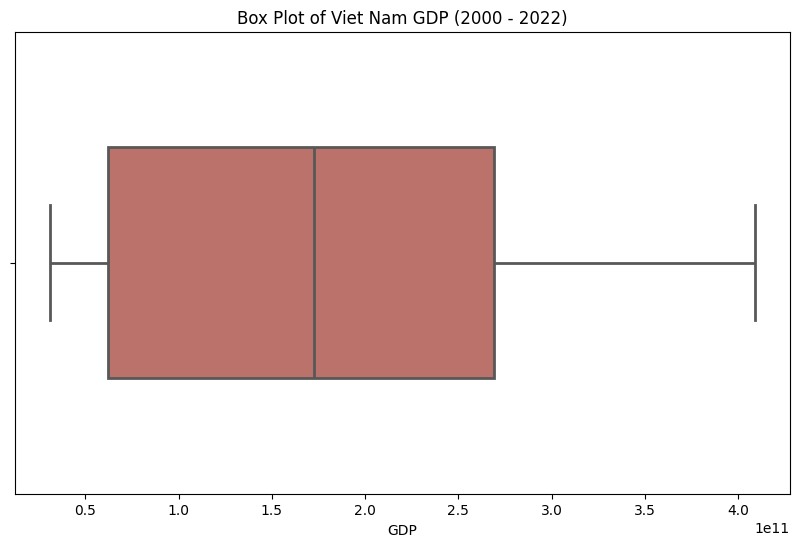

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.14 Vẽ Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_process_1['GDP'], color='#c7675d', width=0.5, linewidth=2)
plt.title('Box Plot of Viet Nam GDP (2000 - 2022)')
plt.xlabel('GDP')
plt.show()

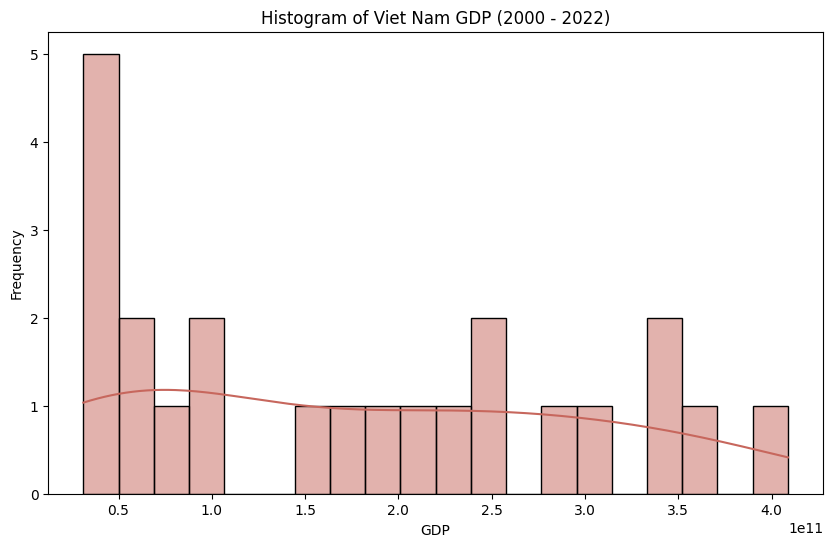

In [22]:
# Vẽ Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_process_1['GDP'],color='#c7675d', bins=20, kde=True)
plt.title('Histogram of Viet Nam GDP (2000 - 2022)')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

## 4 Hàm hóa thống kê mô tả💯

,GDP
count,2.300000e+01
mean,1.781195e+11
std,1.231488e+11
min,3.117252e+10
25%,6.200246e+10
50%,1.725950e+11
75%,2.692248e+11
max,4.088024e+11
variance,1.516563e+22
std_dev,1.231488e+11


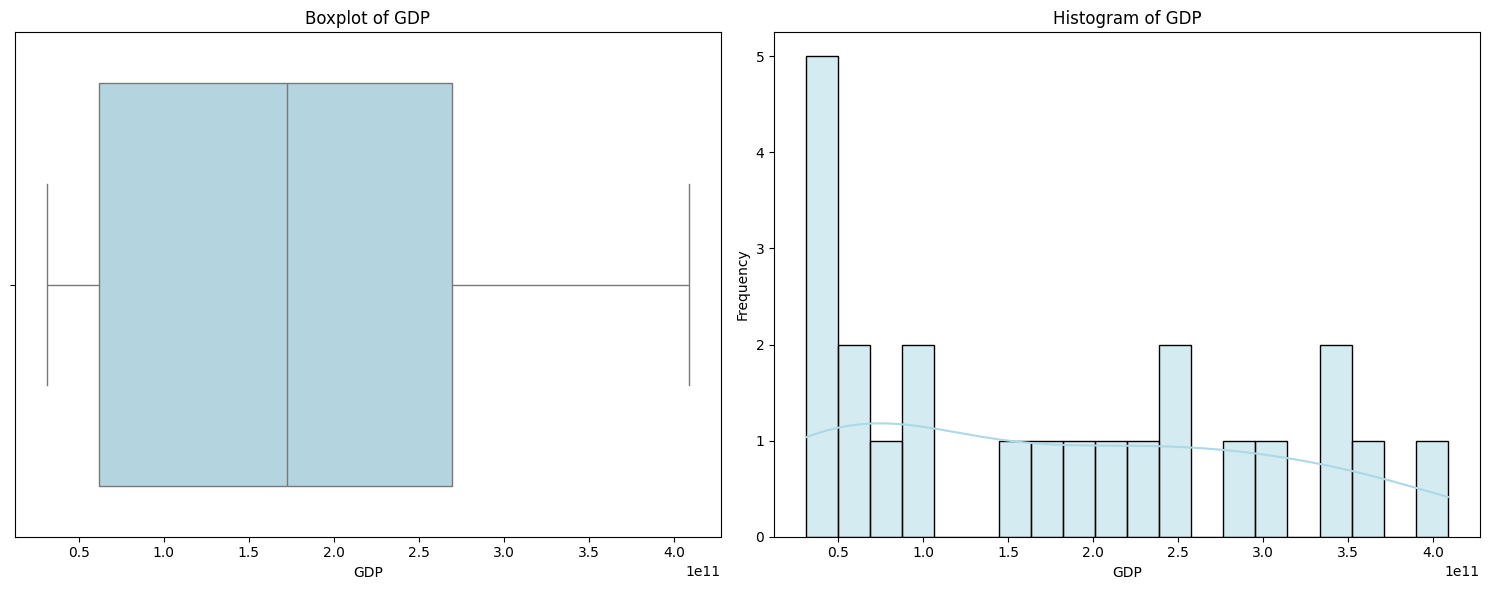

In [23]:
import pandas as pd

def descriptive_stats_and_plots(data):
    """
    Thực hiện thống kê mô tả và vẽ Boxplot và Histogram cho dữ liệu GDP.

    Parameters:
    - data: Pandas Series hoặc NumPy array chứa dữ liệu GDP.

    Returns:
    None (Hiển thị biểu đồ và bảng thống kê mô tả).
    """

    # Bảng thống kê mô tả
    stats_table = data.describe()

    # Thêm các thống kê khác
    stats_table['variance'] = data.var(ddof=1)
    stats_table['std_dev'] = data.std(ddof=1)
    stats_table['range'] = data.max() - data.min()
    stats_table['IQR'] = stats_table['75%'] - stats_table['25%']
    stats_table['skewness'] = data.skew()
    stats_table['kurtosis'] = data.kurtosis()

    # Hiển thị bảng thống kê mô tả
    display(pd.DataFrame(stats_table))

    # Vẽ Boxplot và Histogram
    plt.figure(figsize=(15, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data, color='lightblue', fliersize=5)
    plt.title('Boxplot of GDP')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data, bins=20, kde=True, color='lightblue', edgecolor='black')
    plt.title('Histogram of GDP')
    plt.xlabel('GDP')
    plt.ylabel('Frequency')

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

# Sử dụng hàm với dữ liệu GDP của bạn (đặt tên DataFrame và cột GDP thích hợp)
descriptive_stats_and_plots(df_process_1['GDP'])


## Bổ sung một số kiến thức khác💯

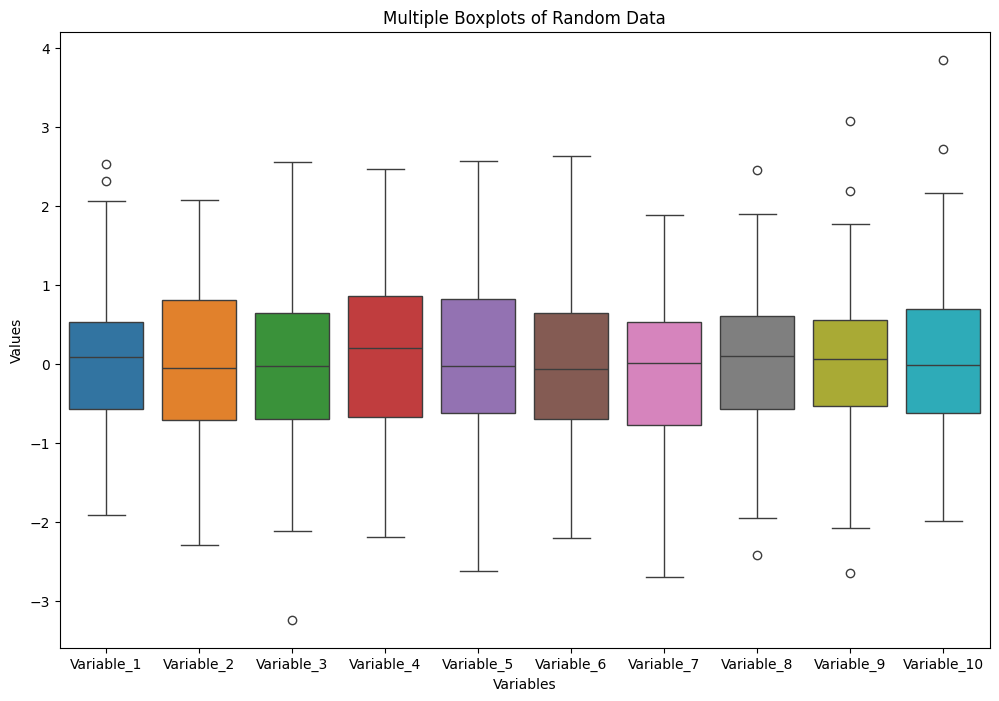

In [24]:
#Bonus 1. Boxplot trên cùng một biểu đồ và chú thích 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một DataFrame ngẫu nhiên với 10 cột và 100 dòng
np.random.seed(42)
data = np.random.randn(100, 10)
df = pd.DataFrame(data, columns=[f'Variable_{i}' for i in range(1, 11)])

# Vẽ Boxplot cho từng cột
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Multiple Boxplots of Random Data')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


In [25]:
df

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
...,...,...,...,...,...,...,...,...,...,...
95,-0.241236,0.352055,-1.251539,1.443765,-0.082151,1.117296,0.342725,0.456753,0.569767,0.447709
96,0.642723,1.329153,0.196521,0.709004,-0.089736,1.440117,-0.676392,1.800940,-0.040158,-1.430775
97,0.128104,-0.681052,0.840644,-0.652624,-0.446183,-1.889541,-0.452306,-2.423879,-1.583903,0.760415
98,0.785800,0.425458,-0.966976,-0.047711,-0.003603,-1.158365,1.503398,0.877362,-0.220964,0.026886


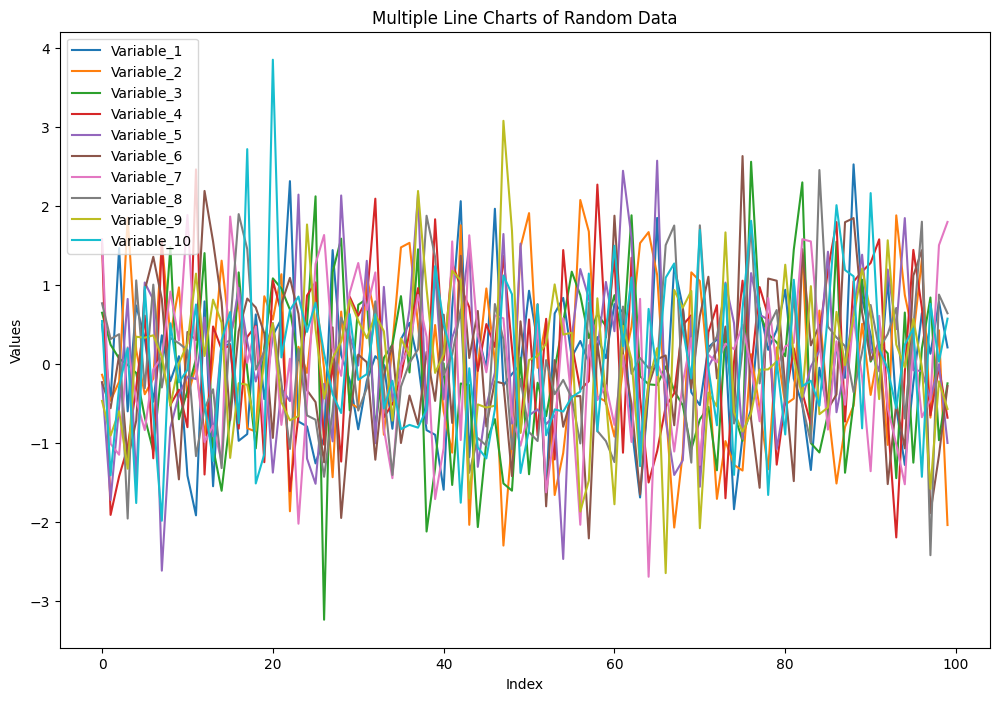

In [26]:
# Bonus 2. Vẽ biểu đồ Line Chart trong một biểu đồ
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một DataFrame ngẫu nhiên với 10 cột và 100 dòng
np.random.seed(42)
data = np.random.randn(100, 10)
df = pd.DataFrame(data, columns=[f'Variable_{i}' for i in range(1, 11)])

# Vẽ Line Chart cho từng cột
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, dashes=False)
plt.title('Multiple Line Charts of Random Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()


## Bài tập. So sánh về tốc độ tăng trưởng GDP giữa 11 nước Đông Nam Á (2000 - 2022)💯

### Yêu cầu 1. Bạn hãy lấy dữ liệu từ nguồn world data từ năm 2000 - 2020 của 11 quốc gia Đông Nam Á

### Yêu cầu 2. Bạn hãy thống kê mô tả của 5 Quốc Gia bất kì trong 11 Quốc Gia

### Yêu cầu 3. Vẽ biểu đồ Boxplot và Line Chart của 11 Quốc Gia trên một biểu đồ và nhận xét nó

### Yêu cầu 4. Tỉ lệ tăng trưởng của một quốc gia

- Tỉ lệ tăng trưởng của một quốc gia X vào năm Yi  được tính như sau

    $\ \text{Growth Rate}_i = \left( \frac{\text{GDP}_i}{\text{GDP}_\text{i-1}} \right) - 1 \$
    
    
- Bạn hãy thêm cột `Growth_Rate` vào mỗi quốc gia. Sau vẽ biểu đồ Line Chart về chỉ số này của 11 quốc gia

- Nhận xét tốc độ tăng trưởng bằng hình vẽ và bằng số liệu của thống kê mô tả
